In [67]:
from pathlib  import Path 
import pandas as pd
import geopandas as gpd


data_path = Path('./data/raw')

files = {'grid':'trentino-grid.geojson',
         'adm_reg':'administrative_regions_Trentino.json',
        'weather':'meteotrentino-weather-station-data.json',
        'precip':'precipitation-trentino.csv',
        'precip-avail':'precipitation-trentino-data-availability.csv',
        'SET-1':'SET-nov-2013.csv',
        'SET-2':'SET-dec-2013.csv',
        'SET-lines':'line.csv',
        'twitter':'social-pulse-trentino.geojson'}
df_grid = gpd.read_file(data_path / files['grid'])
df_grid.head()

cellId                                           geometry
0      38  POLYGON ((10.91462 45.68201, 10.92746 45.68179...
1      39  POLYGON ((10.92746 45.68179, 10.94029 45.68157...
2      40  POLYGON ((10.94029 45.68157, 10.95312 45.68136...
3     154  POLYGON ((10.90209 45.69122, 10.91493 45.69100...
4     155  POLYGON ((10.91493 45.69100, 10.92777 45.69079...

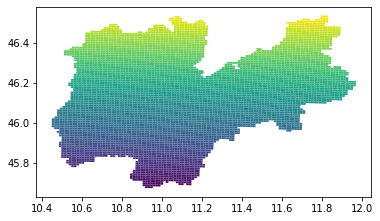

In [68]:
df_grid.plot('cellId')

In [69]:
SET1 = pd.read_csv(data_path / files['SET-1'], names=['LINESET','TIMESTAMP','POWER'])
SET1.head()

LINESET         TIMESTAMP      POWER
0  DG1000420  2013-11-01 00:00  37.439999
1  DG1000420  2013-11-01 00:10  37.439999
2  DG1000420  2013-11-01 00:20  36.000000
3  DG1000420  2013-11-01 00:30  35.279999
4  DG1000420  2013-11-01 00:40  35.279999

In [70]:
SET2 = pd.read_csv(data_path / files['SET-2'], names=['LINESET','TIMESTAMP','POWER'])
SET2.head()

LINESET         TIMESTAMP      POWER
0  DG1000420  2013-12-01 00:00  36.719997
1  DG1000420  2013-12-01 00:10  36.180000
2  DG1000420  2013-12-01 00:20  35.639999
3  DG1000420  2013-12-01 00:30  34.559998
4  DG1000420  2013-12-01 00:40  34.559998

In [71]:
LINESET = pd.read_csv(data_path / files['SET-lines'], names=['SQUARE ID','LINESET','NUM UBICAZIONI'])
LINESET.drop([0], inplace=True)
LINESET.head()

SQUARE ID    LINESET NUM UBICAZIONI
1       155  DG1031221              4
2       272  DG1031221             72
3       273  DG1031221             21
4       276  DG1003117             34
5       277  DG1003117              3

In [72]:
SET=pd.concat([SET1, SET2])

In [73]:
data = pd.merge(LINESET,SET,on='LINESET',how='right',indicator='True') # con left ci sono dei lineset dove non ci sono dei consumi, uso le chiavi 
                                                                       # del dataset di sinistra 
data.head()

SQUARE ID    LINESET NUM UBICAZIONI         TIMESTAMP      POWER  True
0       155  DG1031221              4  2013-11-01 00:00  35.040001  both
1       272  DG1031221             72  2013-11-01 00:00  35.040001  both
2       273  DG1031221             21  2013-11-01 00:00  35.040001  both
3       389  DG1031221             65  2013-11-01 00:00  35.040001  both
4       390  DG1031221              8  2013-11-01 00:00  35.040001  both

In [74]:
data.isnull().any()

SQUARE ID         False
LINESET           False
NUM UBICAZIONI    False
TIMESTAMP         False
POWER             False
True              False
dtype: bool

In [77]:
month_power_cell = data.groupby(['SQUARE ID'])['POWER'].sum()
month_power_cell

SQUARE ID
10000    683617.050161
10001    683617.050161
10004    683617.050161
10104   -118129.324979
10105   -118129.324979
             ...      
9995     623892.016589
9996     623892.016589
9997     683617.050161
9998     683617.050161
9999     683617.050161
Name: POWER, Length: 1984, dtype: float64

In [85]:
month_power_cell['SQUARE ID']=month_power_cell['SQUARE ID'].astype(float)
map_power = pd.merge(df_grid, month_power_cell, left_on='cellId',right_on='SQUARE ID', how='left') 

KeyError: 'SQUARE ID'

In [79]:
map_power.plot('POWER') 

NameError: name 'map_power' is not defined